<a href="https://colab.research.google.com/github/heokwon/Algorithm_Study/blob/main/Programmers/LV.2/Programmer's_Lv2_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **21. 튜플**
셀수있는 수량의 순서있는 열거 또는 어떤 순서를 따르는 요소들의 모음을 튜플(tuple)이라고 합니다. n개의 요소를 가진 튜플을 n-튜플(n-tuple)이라고 하며, 다음과 같이 표현할 수 있습니다.
* (a1, a2, a3, ..., an)

튜플은 다음과 같은 성질을 가지고 있습니다.
1. 중복된 원소가 있을 수 있습니다. ex : (2,3,1,2)
2. 원소에 정해진 순서가 있으며, 원소의 순서가 다르면 서로 다른 튜플입니다. ex : (1,2,3) ≠ (1,3,2)
3. 튜플의 원소 개수는 유한합니다.

원소의 개수가 n개이고, **중복되는 원소가 없는** 튜플 (a1,a2,a3, ..., an) 이 주어질 때(단, a1, a2, ..., an은 자연수), 이는 다음과 같이 집합 기호 '{', '}'를 표현할 수 있습니다.
* {{a1}, {a1, a2}, {a1, a2, a3}, {a1, a2, a3, a4}, ... {a1, a2, a3, a4, ..., an}}

예를 들어 튜플이 (2,1,3,4)인 경우 이는
* {{2}, {2, 1}, {2, 1, 3}, {2, 1, 3, 4}}

와 같이 표현할 수 있습니다. 이때, 집합은 원소의 순서가 바뀌어도 상관없으므로
* {{2}, {2, 1}, {2, 1, 3}, {2, 1, 3, 4}}
* {{2, 1, 3, 4}, {2}, {2, 1, 3}, {2, 1}}
* {{1, 2, 3}, {2, 1}, {1, 2, 4, 3}, {2}}

는 모두 같은 튜플 (2,1,3,4)를 나타냅니다.

특정 튜플을 표현하는 집합이 담긴 문자열 s가 매개변수로 주어질 때, s가 표현하는 튜플을 배열에 담아 return 하도록 solution 함수를 완성해주세요.


[제한사항]
* s의 길이는 5 이상 1,000,000 이하입니다.
* s는 숫자와  '{', '}', ',' 로만 이루어져 있습니다.
* 숫자가 0으로 시작하는 경우는 없습니다.
* s는 항상 중복되는 원소가 없는 튜플을 올바르게 표현하고 있습니다.
* s가 표현하는 튜플의 원소는 1 이상 100,000 이하인 자연수입니다.
* return 하는 배열의 길이가 1 이상 500 이하인 경우만 입력으로 주어집니다.

In [ ]:
# 정규표현식 사용
s = "{{2},{2,1},{2,1,3},{2,1,3,4}}"
import re
def solution(s):
    answer = []
    ss = re.findall('\d+(?:\,\d+)*', s)
    ss = sorted(ss, key=len)
    for i in ss:
        for num in i.split(','):
            if int(num) not in answer: answer.append(int(num))
    return answer
solution(s)

[2, 1, 3, 4]

In [ ]:
# 다른 사람 풀이
import re
from collections import Counter
s = "{{2},{2,1},{2,1,3},{2,1,3,4}}"
def solution(s):

    s = Counter(re.findall('\d+', s))
    return list(map(int, [k for k, v in sorted(s.items(), key=lambda x: x[1], reverse=True)]))
solution(s)

[2, 1, 3, 4]

In [ ]:
# re를 사용하지 않고
def solution(s):
    answer = []

    s1 = s.lstrip('{').rstrip('}').split('},{')

    new_s = []
    for i in s1:
        new_s.append(i.split(','))

    new_s.sort(key = len)

    for i in new_s:
        for j in range(len(i)):
            if int(i[j]) not in answer:
                answer.append(int(i[j]))

    return answer
solution(s)

[2, 1, 3, 4]

## **22. 위장**
스파이들은 매일 다른 옷을 조합하여 입어 자신을 위장합니다.

예를 들어 스파이가 가진 옷이 아래와 같고 오늘 스파이가 동그란 안경, 긴 코트, 파란색 티셔츠를 입었다면 다음날은 청바지를 추가로 입거나 동그란 안경 대신 검정 선글라스를 착용하거나 해야 합니다.

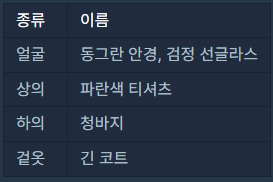

스파이가 가진 의상들이 담긴 2차원 배열 clothes가 주어질 때 서로 다른 옷의 조합의 수를 return 하도록 solution 함수를 작성해주세요.

<br>

**제한사항**
* clothes의 각 행은 [의상의 이름, 의상의 종류]로 이루어져 있습니다.
* 스파이가 가진 의상의 수는 1개 이상 30개 이하입니다.
* 같은 이름을 가진 의상은 존재하지 않습니다.
* clothes의 모든 원소는 문자열로 이루어져 있습니다.
* 모든 문자열의 길이는 1 이상 20 이하인 자연수이고 알파벳 소문자 또는 '_'로만 이루어져 있습니다.
* 스파이는 하루에 최소 한 개의 의상은 입습니다.



```
# 해시를 이용한 풀이
1) HashMap 만들기 (Key - Value의 Pair를 관리하는 Dictionary), Key : 옷의 종류 / Value : 해당 옷 종류의 가짓수(count)

2) clothes 배열에 존재하는 모든 옷의 종류의 count table 만들기
3) 각 옷 종류별 경우의 수를 answer에 곱해주기
```



In [ ]:
clothes = [["yellow_hat", "headgear"], ["blue_sunglasses", "eyewear"], ["green_turban", "headgear"]]
from collections import Counter
from functools import reduce

def solution(clothes):
    counter = Counter([type for clothe, type in clothes]) # 의상 종류별 Counter를 만듬
    answer = reduce(lambda acc, cur: acc*(cur+1), counter.values(), 1) - 1 # 모든 종류의 count + 1을 누적하여 곱해줌
    return answer

solution(clothes)

5

## **23. 기능개발**
프로그래머스 팀에서는 기능 개선 작업을 수행 중입니다. 각 기능은 진도가 100%일 때 서비스에 반영할 수 있습니다.

또, 각 기능의 개발속도는 모두 다르기 때문에 뒤에 있는 기능이 앞에 있는 기능보다 먼저 개발될 수 있고, 이때 뒤에 있는 기능은 앞에 있는 기능이 배포될 때 함께 배포됩니다.

먼저 배포되어야 하는 순서대로 작업의 진도가 적힌 정수 배열 progresses와 각 작업의 개발 속도가 적힌 정수 배열 speeds가 주어질 때 각 배포마다 몇 개의 기능이 배포되는지를 return하도록 solution함수를 완성하세요.

<br>

**제한사항**
* 작업의 개수 (progresses, speeds 배열의 길이) 는 100개 이하입니다.
* 작업 진도는 100 미만의 자연수입니다.
* 작업 속도는 100 이하의 자연수입니다.
* 배포는 하루에 한 번만 할 수 있으며, 하루의 끝에 이루어진다고 가정합니다. 예를 들어 진도율이 95%인 작업의 개발 속도가 하루에 4%라면 배포는 2일 뒤에 이루어집니다.

In [1]:
progresses = [95, 90, 99, 99, 80, 99]
speeds = [1, 1, 1, 1, 1, 1]

# queue FIFO을 활용한 풀이
# 첫번째가 100이 될 때까지 loop를 돌며 time을 늘림 / else절
# time = 7 (일주일) 이 되면 첫번째 값이 100이 되어 if에 따라 pop되고 count += 1
# 현재 time이 7이기 때문에 두번째 값도 if에 따라 pop되고 count += 1
# 세번째 값은 100이 안되기 때문에 loop를 돌며 time을 늘리는데 else절과 달리 그전에 완성된 친구들 count값이 있기 때문에
# 친구들을 출시해줘야 함. 따라서 answer 리스트에 append하고 count 초기화
# 그 후에 loop를 돌며 time을 늘림
# 세번째 값이 100을 넘으면 count += 1하고
# 이 count 를 다시한번 answer 리스트에 append 해줌으로써 마지막 제품까지 출시
def solution(progresses, speeds):

    answer = []
    time = 0
    count = 0

    while len(progresses)> 0:
        if (progresses[0] + time*speeds[0]) >= 100: 
            progresses.pop(0)
            speeds.pop(0)
            count += 1
            
        else:
            if count > 0:
                answer.append(count)
                count = 0
            time += 1
    answer.append(count)
    return answer

solution(progresses, speeds)

[1, 3, 2]

In [5]:
# 다른사람 풀이
# zip을 이용해서 기능의 작업률과 속도를 합쳐 계산이 쉽도록 했다
# `-((p-100)//s)` = 필요한 작업일수를 구하는 계산식
# `Q[i][0]` = 작업이 끝나기까지 필요한 일수
# `Q[i][1]` = `Q[i][0]`일째에 배포 가능한 기능 수
# (Q = [... , [days, functions]]) 뒷 작업은 앞 작업이 끝나기까지 필요한 날짜와 비교해서 작으면 
# 이미 앞작업에서 구했던 Q의 원소에서 기능수 부분에 +1 해주고 크면 list Q에 [필요한 일수, 기능수 = 1]
# 의 형태로 새로 추가
# 원소 개수 만큼 반복이 끝나면 배포 가능한 기능 수 부분만 잘라서 답을 리턴

progresses = [95, 90, 99, 99, 80, 99]
speeds = [1, 1, 1, 1, 1, 1]
def solution(progresses, speeds):
    Q=[]
    for p, s in zip(progresses, speeds):
        if len(Q)==0 or Q[-1][0]<-((p-100)//s): Q.append([-((p-100)//s),1])
        else: Q[-1][1]+=1
    return [q[1] for q in Q]
solution(progresses, speeds)

[1, 3, 2]